# Veggies Classification using Vgg16 CNN Model

Reference: https://www.kaggle.com/code/chitwanmanchanda/vegetable-image-classification-using-cnn

Dataset: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### Extracting data

In [2]:
train_path = "Vegetable_Images/train"
validation_path = "Vegetable_Images/validation"
test_path = "Vegetable_Images/test"

In [3]:
import os
os.listdir('Vegetable_Images')

['test', 'train', 'validation']

### Data Preprocessing

In [4]:
# classifying the dataset into train and test data.
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_datagen = image_dataset_from_directory(train_path, label_mode='categorical',image_size=(224,224),seed = 1)
validation_datagen = image_dataset_from_directory(validation_path,label_mode='categorical',image_size=(224,224),seed = 1)
test_datagen = image_dataset_from_directory(test_path,label_mode='categorical',image_size=(224,224),seed = 1)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [5]:
class_names = train_datagen.class_names
class_map = {i: class_name for i, class_name in enumerate(class_names)}
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


Number of classes = 15

### VGG16 Model Building

In [8]:
from tensorflow.keras import layers, models, Input
from tensorflow.keras.applications import VGG16

# Loading VGG16 Model as base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Freezing the layers of VGG16
for layer in base_model.layers:
    layer.trainable = False

# Input layer
input_layer = Input(shape=(224, 224, 3))
# Adding VGG16 base model
x = base_model(input_layer, training=False)

# Flattening the output
x = layers.Flatten()(x)

# Dense Layer 1
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization()(x)

# Dense Layer 2
output_layer = layers.Dense(15, activation='softmax')(x)

# Creating the model
model = models.Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,321,615 (62.26 MB)

 Trainable params: 1,606,799 (6.13 MB)

 Non-trainable params: 14,714,816 (56.13 MB)

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
hist = model.fit(train_datagen, validation_data=validation_datagen, epochs=3)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 2561s 5s/step - accuracy: 0.9128 - loss: 0.3984 - val_accuracy: 0.9973 - val_loss: 0.0161
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 3052s 7s/step - accuracy: 0.9993 - loss: 0.0136 - val_accuracy: 0.9977 - val_loss: 0.0085
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 2584s 6s/step - accuracy: 0.9997 - loss: 0.0057 - val_accuracy: 0.9977 - val_loss: 0.0078


### Model Evaluation

In [11]:
# Predict the accuracy for the test dataset
test_loss, test_accuracy = model.evaluate(test_datagen)
test_accuracy

94/94 ━━━━━━━━━━━━━━━━━━━━ 373s 4s/step - accuracy: 0.9990 - loss: 0.0032


0.9983333349227905

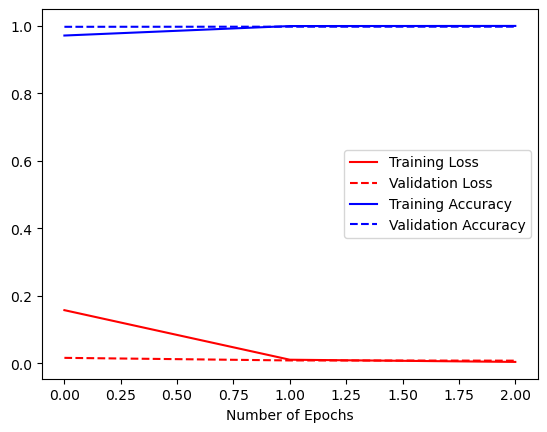

In [12]:
# Plotting loss and accuracy of validation and test data
h = hist.history
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend()

### Testing the model

In [13]:
testdata_class_names = test_datagen.class_names

In [14]:
from tensorflow.keras.preprocessing import image 

def predicting_images(testdata_class_names):
    # Creating a figure
    plt.figure(figsize=(16, 16))
    for i, testdata_class_name in enumerate(testdata_class_names):
        
        # Loading images for the each category of train dataset
        image_path = test_path + '/' + testdata_class_name
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[2]
        first_image_path = image_path + '/' + first_image_of_folder
        test_image = image.load_img(first_image_path,target_size=(224,224))
        
        # Showing test image
        plt.subplot(5, 5, i+1)
        plt.imshow(test_image)
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image,axis=0) 

        # Predicting the test image  
        predicted_label = np.argmax(model.predict(test_image))
        predicted_vegetable = class_map[predicted_label]
        predicted_vegetable
        
        
        # Create Subplot and plot the images
        plt.title("Predicted: {}".format(predicted_vegetable))
        plt.axis('off')
        
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


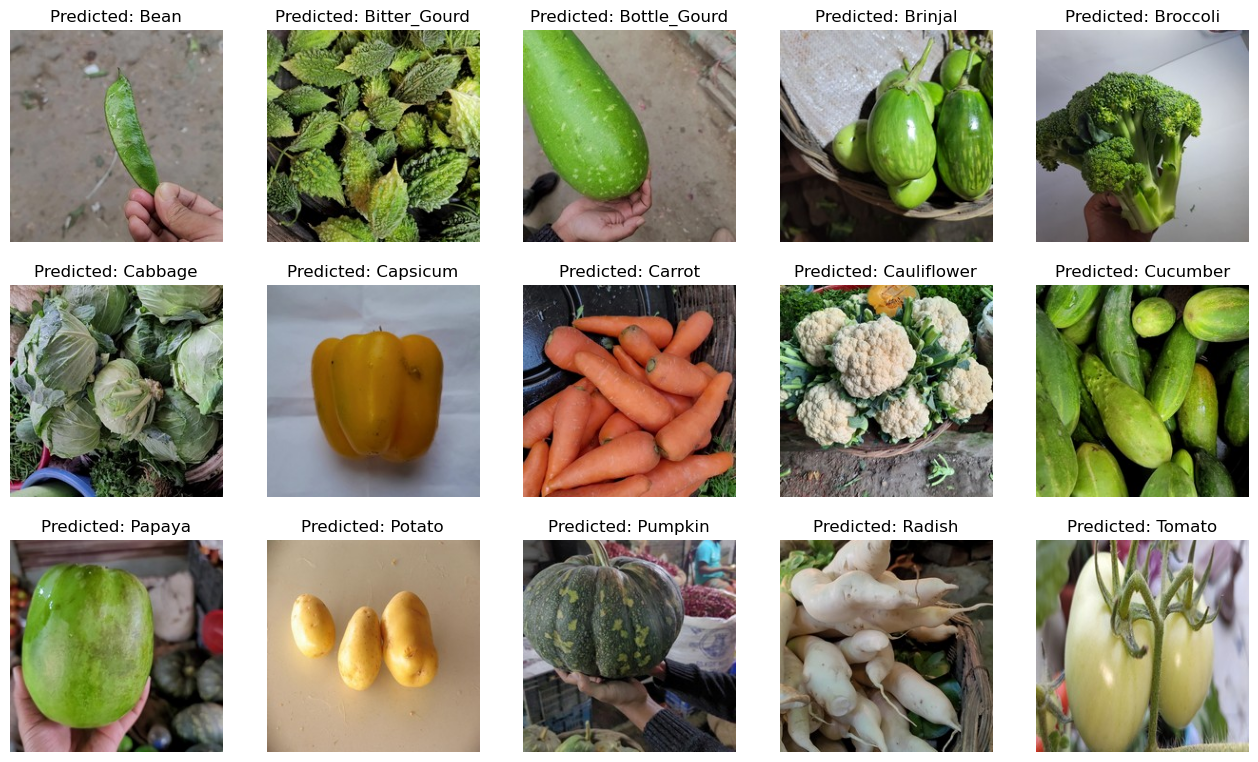

In [15]:
# Calling the function to predict images
predicting_images(testdata_class_names)

### Saving the model

In [16]:
model.save("veggiesClassification_model.keras")